## EDA: разведочный анализ данных по проекту

In [84]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [85]:
path = './_data.csv'
df = pd.read_csv(path)
# df.columns.to_list()

### Общие сведения о датасете:

In [86]:
print(f'Общее количество строк в датасете: {df.shape[0]}, количество колонок: {df.shape[1]}.')
print('Наименование колонок:')
for i in range(df.shape[1]):
    print(f'- {df.columns[i]}')

Общее количество строк в датасете: 23368, количество колонок: 25.
Наименование колонок:
- Unnamed: 0
- ID  объявления
- Количество комнат
- Тип
- Метро
- Адрес
- Площадь, м2
- Дом
- Парковка
- Цена
- Телефоны
- Описание
- Ремонт
- Площадь комнат, м2
- Балкон
- Окна
- Санузел
- Можно с детьми/животными
- Дополнительно
- Название ЖК
- Серия дома
- Высота потолков, м
- Лифт
- Мусоропровод
- Ссылка на объявление


Учитывая, что пилотным регионом является Москва, из датасета были исключены строки с объектами недвижимости, расположенными не в Москве.

In [87]:
df = df[df["Адрес"].str.contains("Москва")]
df

print(f'Количество строк, оставшихся после исключения объектов, расположенных не в Москве: {df.shape[0]}')

Количество строк, оставшихся после исключения объектов, расположенных не в Москве: 19737


Общие сведения об отсутствующих значениях по всему датасету:

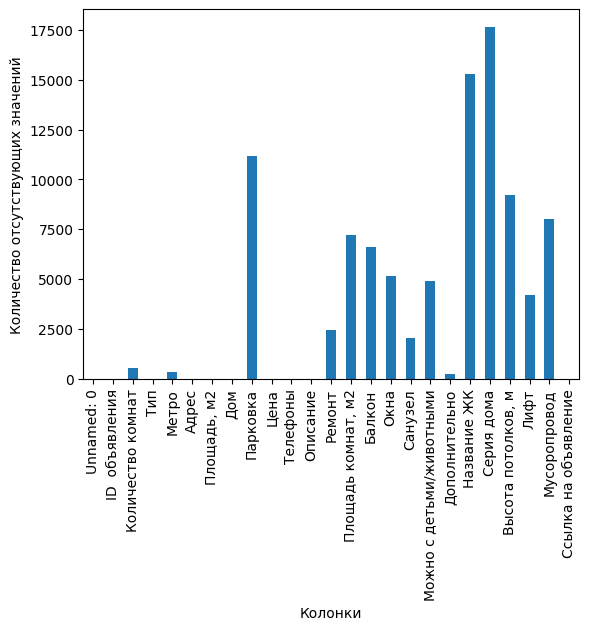

In [88]:
nan_counts = df.isna().sum()
nan_counts.plot(kind='bar')
plt.xlabel('Колонки')
plt.ylabel('Количество отсутствующих значений')
plt.show()

В процессе реализации этапа EDA были исследованы данные по каждой колонке датасета, сделаны предварительные выводы о целесообразности либо нецелесообразности включения тех или иных колонок с данными в финальный датасет, о необходимости преобразования данных, о возможных стратегиях решения проблемы отсутствия значений.\
\
При выполнении исследования и принятии решений об использовании либо отказе от использования тех или иных данных, содержащихся в датасете, принимались во внимание:

1. Предшествующий опыт и знания членов команды об исследуемом рынке.
2. Объективные ограничения команды по времени и доступным ресурсам.

### Результаты предварительного анализа по каждой колонке данных в датасете представлены ниже:

**Колонка 0**

In [91]:
symbol = 0
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка представляет собой последовательный возрастающий ряд целых чисел, начиная от "0", дублирующий индекс первоначального датасета.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
print('Колонка подлежит исключению, так как не содержит ценных данных для последующей работы.')

Название колонки: Unnamed: 0
Колонка представляет собой последовательный возрастающий ряд целых чисел, начиная от "0", дублирующий индекс первоначального датасета.
Уникальны ли значения в колонке:  да.
Содержит ли колонка отсутствующие значения: нет.
Тип данных в колонке: int64
Колонка подлежит исключению, так как не содержит ценных данных для последующей работы.


**Колонка 1**

In [92]:
symbol = 1
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит перечень идентификационных номеров предложений.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
print('Колонка подлежит исключению, так как не содержит ценных данных для последующей работы.')

Название колонки: ID  объявления
Колонка содержит перечень идентификационных номеров предложений.
Уникальны ли значения в колонке:  да.
Содержит ли колонка отсутствующие значения: нет.
Тип данных в колонке: int64
Колонка подлежит исключению, так как не содержит ценных данных для последующей работы.


**Колонка 2**

Название колонки: Количество комнат
Колонка содержит значение количества комнат в сдаваемом в аренду объекте недвижимости.
Уникальны ли значения в колонке: нет.
Содержит ли колонка отсутствующие значения: да. Количество отсутствующих значений: 535. Доля отсутствующих значений в датасете: 2.71%.
Тип данных в колонке: object
Минимальное количество комнат в объекте недвижимости: 1, максимальное количество комнат в объекте недвижимости: 6


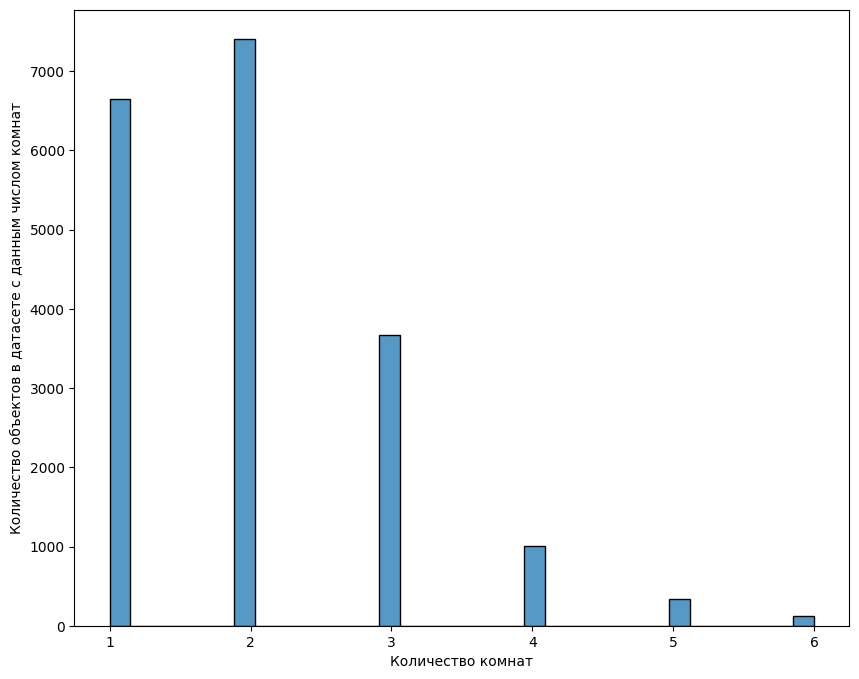

Колонка подлежит использованию в финальном датасете, с переводом значений в формат int. Для разрешения проблемы частично отсутствующих значений 
предполагается создание отдельной колонки с двумя возможными значениями: 0 или 1 (Indicator Method).


In [93]:
symbol = 2
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит значение количества комнат в сдаваемом в аренду объекте недвижимости.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
df['rooms'] = df.iloc[:,2].apply(lambda x: int(x.split(',')[0]) if pd.notnull(x) else x)
rooms = df['rooms'].unique().tolist()
rooms = [int(x) for x in rooms if pd.notnull(x)]
print(f'Минимальное количество комнат в объекте недвижимости: {min(rooms)}, максимальное количество комнат в объекте недвижимости: {max(rooms)}')
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='rooms')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объектов в датасете с данным числом комнат')
plt.show();
# ПЛОТ ОБЩАЯ ПЛОЩАДЬ / КОМНАТЫ
print('Колонка подлежит использованию в финальном датасете, с переводом значений в формат int. Для разрешения проблемы частично отсутствующих значений \nпредполагается создание отдельной колонки с двумя возможными значениями: 0 или 1 (Indicator Method).')

**Колонка 3**

In [94]:
symbol = 3
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит указание типа сдаваемого в аренду объекта недвижимости.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Перечень уникальных значений: {df.iloc[:,3].unique()}; таким образом, все значения в колонке идентичны друг другу.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
print('Колонка подлежит исключению ввиду неинформативности (имеется единственное уникальное значение).')

Название колонки: Тип
Колонка содержит указание типа сдаваемого в аренду объекта недвижимости.
Уникальны ли значения в колонке: нет.
Перечень уникальных значений: ['Квартира']; таким образом, все значения в колонке идентичны друг другу.
Содержит ли колонка отсутствующие значения: нет.
Тип данных в колонке: object
Колонка подлежит исключению ввиду неинформативности (имеется единственное уникальное значение).


**Колонка 4**

In [96]:
symbol = 4
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит информацию о станции метро, вблизи которой находится объект недвижимости, а также о времени, затрачиваемом на перемещение до станции метро.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
print(f'В финальный датасет будет включена (посредством метода One Hot Encoding) информация из колонки {df.columns[4]} (в части названия станций метро).')
print(f'В случае сохранения информации о названиях станций метро, строки с отсутствующими значениями (ввиду их малочисленности) будут исключены из датасета (Complete Case Analysis).')
print(f'Подлежит уточнению и дополнительной оценке целесообразность включения в финальный датасет информации о времени перемещения до станции метро.')
# df['subway'] = df.iloc[:,4].apply(lambda x: x.split(' ')[1] if pd.notnull(x) else x)
# stations = df['subway'].unique().tolist()
# Метро: OHE + транслитерационный словарь. 


Название колонки: Метро
Колонка содержит информацию о станции метро, вблизи которой находится объект недвижимости, а также о времени, затрачиваемом на перемещение до станции метро.
Уникальны ли значения в колонке: нет.
Содержит ли колонка отсутствующие значения: да. Количество отсутствующих значений: 346. Доля отсутствующих значений в датасете: 1.7500000000000002%.
Тип данных в колонке: object
В финальный датасет будет включена (посредством метода One Hot Encoding) информация из колонки Метро (в части названия станций метро).
В случае сохранения информации о названиях станций метро, строки с отсутствующими значениями (ввиду их малочисленности) будут исключены из датасета (Complete Case Analysis).
Подлежит уточнению и дополнительной оценке целесообразность включения в финальный датасет информации о времени перемещения до станции метро.


**Колонка 5**

In [97]:
symbol = 5
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит информацию об адресе объекта.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
print(f'Ввиду затруднительности применения метода One Hot Encoding к данным из колонки {df.columns[5]}, целесообразно её исключение.')

Название колонки: Адрес
Колонка содержит информацию об адресе объекта.
Уникальны ли значения в колонке: нет.
Содержит ли колонка отсутствующие значения: нет.
Тип данных в колонке: object
Ввиду затруднительности применения метода One Hot Encoding к данным из колонки Адрес, целесообразно её исключение.


**Колонка 6**

Название колонки: Площадь, м2
Колонка содержит информацию о площади объекта недвижимости.
Уникальны ли значения в колонке: нет.
Содержит ли колонка отсутствующие значения: нет.
Тип данных в колонке: object
Площадь объекта с минимальной площадью: 7.0, площадь объекта с максимальной площадью: 811.0


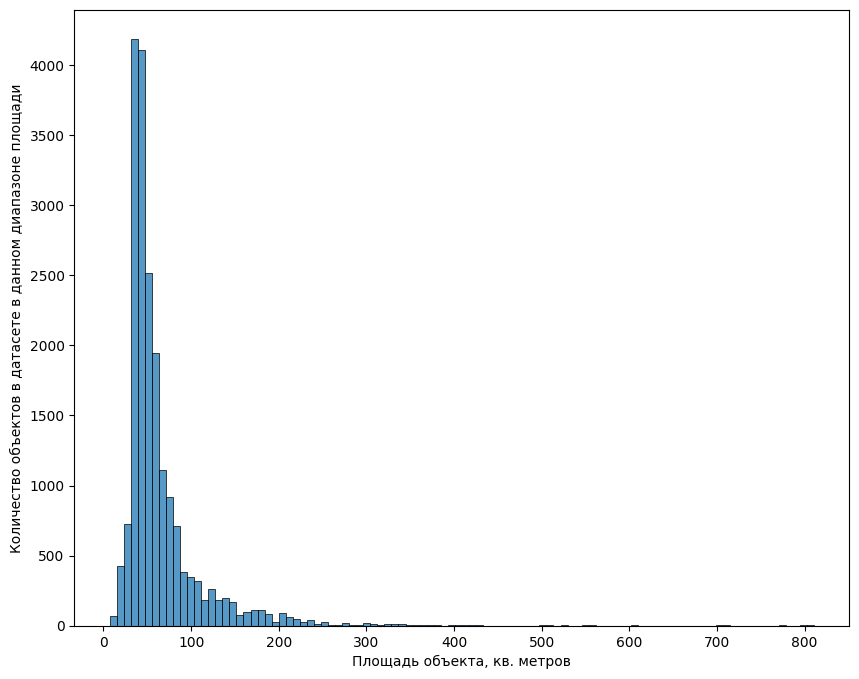

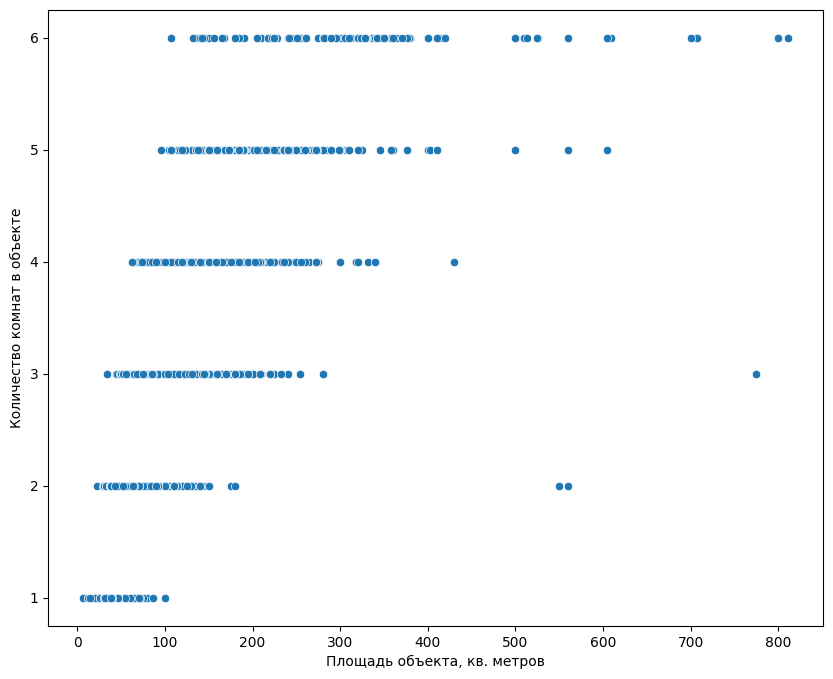

Колонка подлежит сохранению с переводом значений (первое значение в строке, соответствующее общей площади) в числовой формат.


In [98]:
symbol = 6
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит информацию о площади объекта недвижимости.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
df['area'] = df.iloc[:,6].apply(lambda x: float(x.split('/')[0]))
areas = df['area'].unique().tolist()
print(f'Площадь объекта с минимальной площадью: {min(areas)}, площадь объекта с максимальной площадью: {max(areas)}')
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='area', bins=100)
plt.xlabel('Площадь объекта, кв. метров')
plt.ylabel('Количество объектов в датасете в данном диапазоне площади')
plt.show();
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='area', y='rooms')
plt.xlabel('Площадь объекта, кв. метров')
plt.ylabel('Количество комнат в объекте')
plt.show();
print('Колонка подлежит сохранению с переводом значений (первое значение в строке, соответствующее общей площади) в числовой формат.')

**Колонка 7**

In [99]:
symbol = 7
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит информацию об этажности домов, этажах расположения объектов недвижимости в домах, а также о типах домов.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
df['house'] = df.iloc[:,7].apply(lambda x: x.split(', '))
df['floors'] = df.loc[:,'house'].apply(lambda x: x[0])
df['apartment_floors'] = df.loc[:,'floors'].apply(lambda x: int(x.split('/')[0]))
df['total_floors'] = df.loc[:,'floors'].apply(lambda x: int(x.split('/')[1]))
df['types'] = df['house'].apply(lambda x: x[1] if len(x) > 1 else float('nan'))
df['types'].head(15)
types = df['types'].unique().tolist()
types = [i for i in types if isinstance(i, str)]
total_floors = df['total_floors'].unique().tolist()
total_floors = sorted(total_floors)
# 116-этажный дом - вычистить из сета.
print('Типы домов, представленных в датасете:')
for i in types:
    print('   - ' + i)
print('Данные из колонки подлежат использованию в финальном датасете. Для разрешения проблемы частично отсутствующих значений \n(в части типов домов) предполагается создание отдельной колонки с двумя возможными значениями: 0 или 1 (Indicator Method).')

Название колонки: Дом
Колонка содержит информацию об этажности домов, этажах расположения объектов недвижимости в домах, а также о типах домов.
Уникальны ли значения в колонке: нет.
Содержит ли колонка отсутствующие значения: нет.
Тип данных в колонке: object
Типы домов, представленных в датасете:
   - Монолитный
   - Монолитно-кирпичный
   - Панельный
   - Сталинский
   - Кирпичный
   - старый фонд
   - Блочный
   - Деревянный
   - Щитовой
Данные из колонки подлежат использованию в финальном датасете. Для разрешения проблемы частично отсутствующих значений 
(в части типов домов) предполагается создание отдельной колонки с двумя возможными значениями: 0 или 1 (Indicator Method).


**Колонка 8**

Название колонки: Парковка
Колонка содержит информацию о парковке.
Уникальны ли значения в колонке: нет.
Содержит ли колонка отсутствующие значения: да. Количество отсутствующих значений: 11174. Доля отсутствующих значений в датасете: 56.61000000000001%.
Тип данных в колонке: object


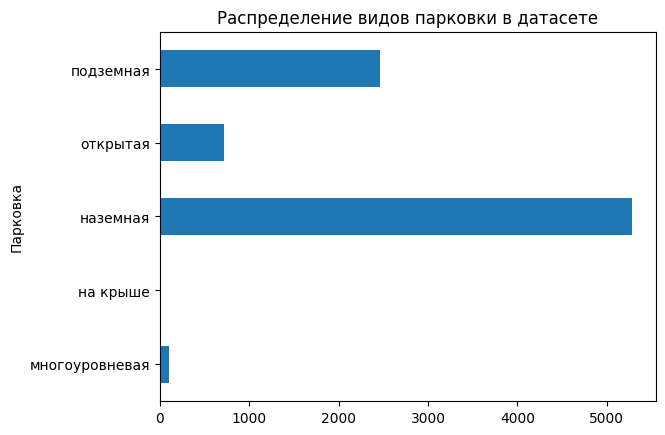

Ввиду большого числа пропусков данных сохранение колонки в финальном датасете нецелесообразно.


In [100]:
symbol = 8
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит информацию о парковке.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
uniq_parking=df.groupby('Парковка')['Парковка'].count()
uniq_parking.plot(kind='barh')
plt.title('Распределение видов парковки в датасете')
plt.show();
print('Ввиду большого числа пропусков данных сохранение колонки в финальном датасете нецелесообразно.')

**Колонка 9**

Название колонки: Цена
Колонка содержит информацию о ежемесячной стоимости аренды (в рублях РФ), о дополнительных условиях, относящихся к цене (залог, включение коммунальных услуг в стоимость).
Уникальны ли значения в колонке: нет.
Содержит ли колонка отсутствующие значения: нет.
Тип данных в колонке: object
Минимальная стоимость аренды: 5000.0 рублей РФ, максимальная стоимость аренды: 3000000.0 рублей РФ.


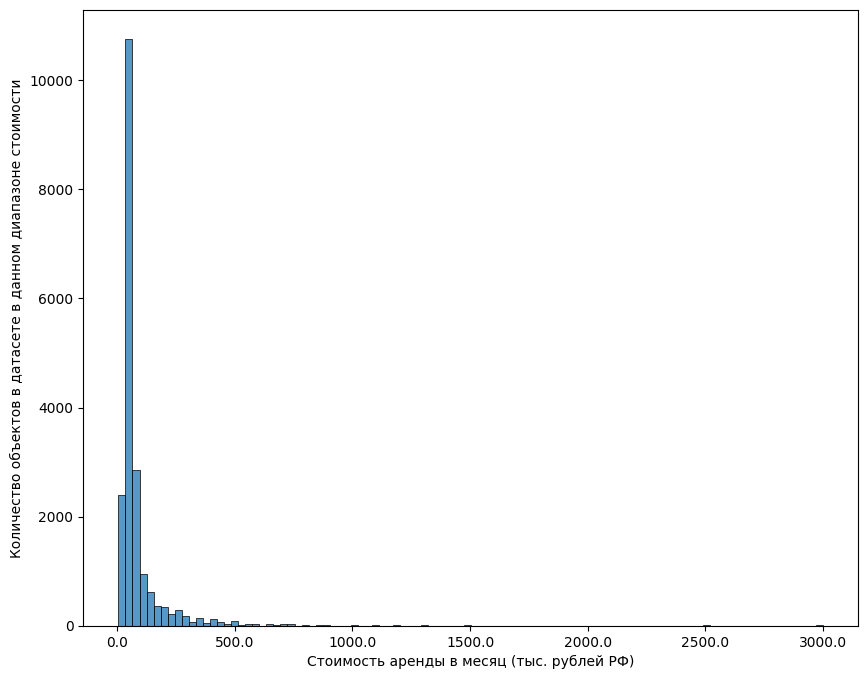

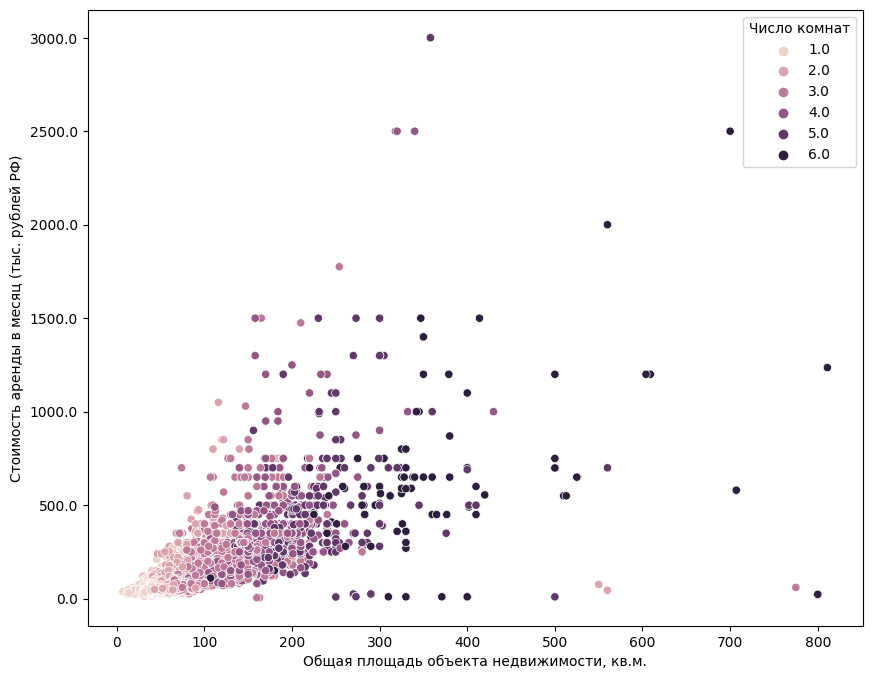

Колонка подлежит сохранению в части ежемесячной стоимости аренды в требуемом числовом формате.


In [126]:
symbol = 9
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит информацию о ежемесячной стоимости аренды (в рублях РФ), о дополнительных условиях, относящихся к цене (залог, включение коммунальных услуг в стоимость).')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
df['price'] = df['Цена'].apply(lambda x: float(x.split()[0]))
prices = df['price'].unique().tolist()
print(f'Минимальная стоимость аренды: {min(prices)} рублей РФ, максимальная стоимость аренды: {max(prices)} рублей РФ.')
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='price', bins=100)
plt.xlabel('Стоимость аренды в месяц (тыс. рублей РФ)')
plt.ylabel('Количество объектов в датасете в данном диапазоне стоимости')
def label(value, index):
    return value / 1000
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(label))
plt.show();
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='area', y='price', hue='rooms')
plt.xlabel('Общая площадь объекта недвижимости, кв.м.')
plt.ylabel('Стоимость аренды в месяц (тыс. рублей РФ)')
def label(value, index):
    return value / 1000
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(label))
plt.legend(title='Число комнат')
plt.show();
print('Колонка подлежит сохранению в части ежемесячной стоимости аренды в требуемом числовом формате.')

**Колонка 10**

In [103]:
symbol = 10
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит информацию о контактных телефонах.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
print('Колонка подлежит исключению, так как не содержит ценных данных для последующей работы.')

Название колонки: Телефоны
Колонка содержит информацию о контактных телефонах.
Уникальны ли значения в колонке: нет.
Содержит ли колонка отсутствующие значения: нет.
Тип данных в колонке: object
Колонка подлежит исключению, так как не содержит ценных данных для последующей работы.


**Колонка 11**

In [105]:
symbol = 11
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит описания предложений по аренде в текстовом формате.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
print('Колонка подлежит исключению, так как не содержит ценных данных для последующей работы.')

Название колонки: Описание
Колонка содержит описания предложений по аренде в текстовом формате.
Уникальны ли значения в колонке: нет.
Содержит ли колонка отсутствующие значения: нет.
Тип данных в колонке: object
Колонка подлежит исключению, так как не содержит ценных данных для последующей работы.


**Колонка 12**

Название колонки: Ремонт
Колонка содержит перечень идентификационных номеров предложений.
Уникальны ли значения в колонке: нет.
Содержит ли колонка отсутствующие значения: да. Количество отсутствующих значений: 2463. Доля отсутствующих значений в датасете: 12.479999999999999%.
Тип данных в колонке: object


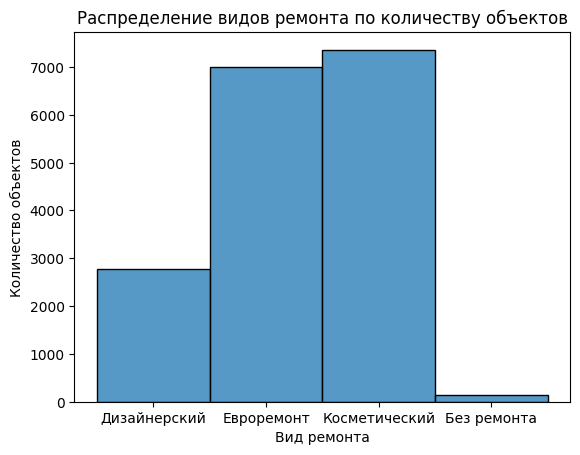

Колонка подлежит сохранению с приведением в требуемый формат данных (с использованием метода OHE).


In [106]:
symbol = 12
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит перечень идентификационных номеров предложений.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
df['Ремонт'].nunique()
sns.histplot(x='Ремонт', data=df)
plt.ylabel('Количество объектов')
plt.xlabel('Вид ремонта')
plt.title('Распределение видов ремонта по количеству объектов')
plt.show();
print(f'Колонка подлежит сохранению с приведением в требуемый формат данных (с использованием метода OHE).')

**Колонка 13**

In [107]:
symbol = 13
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит указание площади комнат в объектах недвижимости.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
print('Колонка подлежит исключению ввиду её производного характера (т.к. сохраняются колонки с указанием числа комнат и общей площади), а также большого числа пропусков данных.')

Название колонки: Площадь комнат, м2
Колонка содержит указание площади комнат в объектах недвижимости.
Уникальны ли значения в колонке: нет.
Содержит ли колонка отсутствующие значения: да. Количество отсутствующих значений: 7228. Доля отсутствующих значений в датасете: 36.620000000000005%.
Тип данных в колонке: object
Колонка подлежит исключению ввиду её производного характера (т.к. сохраняются колонки с указанием числа комнат и общей площади), а также большого числа пропусков данных.


**Колонка 14**

In [108]:
symbol = 14
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит информацию о наличии и количестве балконов/лоджий в объектах недвижимости.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
print('Колонка подлежит исключению ввиду большого числа пропусков данных.')

Название колонки: Балкон
Колонка содержит информацию о наличии и количестве балконов/лоджий в объектах недвижимости.
Уникальны ли значения в колонке: нет.
Содержит ли колонка отсутствующие значения: да. Количество отсутствующих значений: 6630. Доля отсутствующих значений в датасете: 33.589999999999996%.
Тип данных в колонке: object
Колонка подлежит исключению ввиду большого числа пропусков данных.


**Колонка 15**

In [110]:
symbol = 15
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит информацию о направлении выхода окон объекта недвижимости (на улицу, во двор).')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
print('Колонка подлежит исключению ввиду большого числа пропусков данных.')

Название колонки: Окна
Колонка содержит информацию о направлении выхода окон объекта недвижимости (на улицу, во двор).
Уникальны ли значения в колонке: нет.
Содержит ли колонка отсутствующие значения: да. Количество отсутствующих значений: 5150. Доля отсутствующих значений в датасете: 26.090000000000003%.
Тип данных в колонке: object
Колонка подлежит исключению ввиду большого числа пропусков данных.


**Колонка 16**

In [112]:
symbol = 16
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит информацию о совмещённом / раздельном характере санузла на объекте недвижимости.')
print(f'Уникальны ли значения значения в колонке: {"да" if len(set(df.iloc[:,16])) == len(df.iloc[:,16]) else "нет"}')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,16].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,16].isnull().sum() / len(df.iloc[:,16]), 4) * 100) + "%" if df.iloc[:,16].isnull().any() else "нет"}')
print('Колонка подлежит исключению ввиду большого числа пропусков данных и предварительно экспертно оценённой нерелевантности параметра для определения стоимости аренды.')

Название колонки: Санузел
Колонка содержит информацию о совмещённом / раздельном характере санузла на объекте недвижимости.
Уникальны ли значения значения в колонке: нет
Содержит ли колонка отсутствующие значения: да. Количество отсутствующих значений: 2041. Доля отсутствующих значений в датасете: 10.34%
Колонка подлежит исключению ввиду большого числа пропусков данных и предварительно экспертно оценённой нерелевантности параметра для определения стоимости аренды.


**Колонка 17**

Название колонки: Можно с детьми/животными
Колонка содержит информацию о допустимости проживания детей / животных на объекте недвижимости.
Уникальны ли значения в колонке: нет.
Содержит ли колонка отсутствующие значения: да. Количество отсутствующих значений: 4915. Доля отсутствующих значений в датасете: 24.9%.
Тип данных в колонке: object


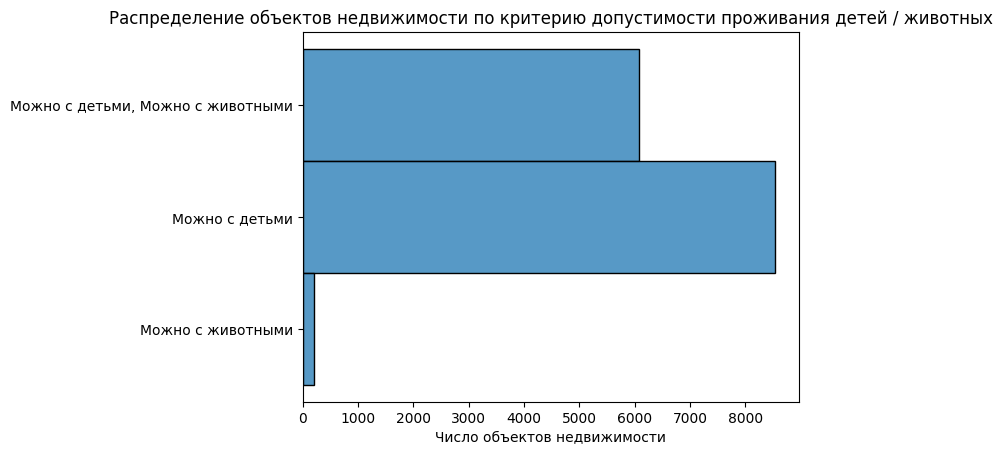

Рассматривается возможность сохранения колонки для финального датасета в случае идентификации способа разрешения проблемы большого числа отсутствующих значений.


In [113]:
symbol = 17
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит информацию о допустимости проживания детей / животных на объекте недвижимости.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
sns.histplot(data=df, y='Можно с детьми/животными', bins=100)
plt.title('Распределение объектов недвижимости по критерию допустимости проживания детей / животных')
plt.xlabel('Число объектов недвижимости')
plt.ylabel('')
plt.show();
print('Рассматривается возможность сохранения колонки для финального датасета в случае идентификации способа разрешения проблемы большого числа отсутствующих значений.')

**Колонка 18**

In [114]:
symbol = 18
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит о наличии мебели и иных предметов быта на объекте недвижимости.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
print('Колонка подлежит сохранению (в полном или неполном объёме) ввиду экспертной оценки существенного влияния данного параметра на стоимость аренды.')

Название колонки: Дополнительно
Колонка содержит о наличии мебели и иных предметов быта на объекте недвижимости.
Уникальны ли значения в колонке: нет.
Содержит ли колонка отсутствующие значения: да. Количество отсутствующих значений: 272. Доля отсутствующих значений в датасете: 1.38%.
Тип данных в колонке: object
Колонка подлежит сохранению (в полном или неполном объёме) ввиду экспертной оценки существенного влияния данного параметра на стоимость аренды.


**Колонка 19**

In [115]:
symbol = 19
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит перечень названий жилых комплексов (если это применимо), в которых находятся объекты недвижимости.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
print('Колонка подлежит исключению ввиду нерелевантности данных и большого числа пропусков.')

Название колонки: Название ЖК
Колонка содержит перечень названий жилых комплексов (если это применимо), в которых находятся объекты недвижимости.
Уникальны ли значения в колонке: нет.
Содержит ли колонка отсутствующие значения: да. Количество отсутствующих значений: 15281. Доля отсутствующих значений в датасете: 77.42%.
Тип данных в колонке: object
Колонка подлежит исключению ввиду нерелевантности данных и большого числа пропусков.


**Колонка 20**

In [116]:
symbol = 20
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит перечень серий домов, в которых находятся объекты недвижимости.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
print('Колонка подлежит исключению ввиду большого числа пропусков.')

Название колонки: Серия дома
Колонка содержит перечень серий домов, в которых находятся объекты недвижимости.
Уникальны ли значения в колонке: нет.
Содержит ли колонка отсутствующие значения: да. Количество отсутствующих значений: 17646. Доля отсутствующих значений в датасете: 89.41%.
Тип данных в колонке: object
Колонка подлежит исключению ввиду большого числа пропусков.


**Колонка 21**

In [117]:
symbol = 21
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит информацию о высотке потолков.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
print('Колонка подлежит исключению ввиду большого числа пропусков.')

Название колонки: Высота потолков, м
Колонка содержит информацию о высотке потолков.
Уникальны ли значения в колонке: нет.
Содержит ли колонка отсутствующие значения: да. Количество отсутствующих значений: 9202. Доля отсутствующих значений в датасете: 46.62%.
Тип данных в колонке: float64
Колонка подлежит исключению ввиду большого числа пропусков.


**Колонка 22**

In [119]:
symbol = 22
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит информацию о наличии и типе имеющихся лифтов в доме.')
print(f'Уникальны ли значения в колонке:  {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
print('Рассматривается возможность сохранения колонки ввиду экспертно оценённого влияния параметра на стоимость аренды с учётом большого числа пропусков данных.')

Название колонки: Лифт
Колонка содержит информацию о наличии и типе имеющихся лифтов в доме.
Уникальны ли значения в колонке:  нет.
Содержит ли колонка отсутствующие значения: да. Количество отсутствующих значений: 4192. Доля отсутствующих значений в датасете: 21.240000000000002%
Тип данных в колонке: object
Рассматривается возможность сохранения колонки ввиду экспертно оценённого влияния параметра на стоимость аренды с учётом большого числа пропусков данных.


**Колонка 23**

In [123]:
symbol = 23
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит информацию о наличии / отсутствии мусоропровода.')
print(f'Уникальны ли значения в колонке:  {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
print('Колонка подлежит исключению, так как не содержит ценных данных для последующей работы.')

Название колонки: Мусоропровод
Колонка содержит информацию о наличии / отсутствии мусоропровода.
Уникальны ли значения в колонке:  нет.
Содержит ли колонка отсутствующие значения: да. Количество отсутствующих значений: 8007. Доля отсутствующих значений в датасете: 40.57%.
Тип данных в колонке: object
Колонка подлежит исключению, так как не содержит ценных данных для последующей работы.


**Колонка 24**

In [122]:
symbol = 24
print(f'Название колонки: {df.columns[symbol]}')
print('Колонка содержит перечень ссылок на объявления о сдаче соответствующих объектов недвижимости в аренду.')
print(f'Уникальны ли значения в колонке: {"да" if len(set(df.iloc[:,symbol])) == len(df.iloc[:,symbol]) else "нет"}.')
print(f'Содержит ли колонка отсутствующие значения: {"да. Количество отсутствующих значений: " + str(df.iloc[:,symbol].isnull().sum()) + ". Доля отсутствующих значений в датасете: " + str(round(df.iloc[:,symbol].isnull().sum() / len(df.iloc[:,symbol]), 4) * 100) + "%" if df.iloc[:,symbol].isnull().any() else "нет"}.')
print(f'Тип данных в колонке: {df.dtypes[symbol]}')
print('Колонка подлежит исключению, так как не содержит ценных данных для последующей работы.')

Название колонки: Ссылка на объявление
Колонка содержит перечень ссылок на объявления о сдаче соответствующих объектов недвижимости в аренду.
Уникальны ли значения в колонке: да.
Содержит ли колонка отсутствующие значения: нет.
Тип данных в колонке: object
Колонка подлежит исключению, так как не содержит ценных данных для последующей работы.
